In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

In [46]:
df=pd.read_csv("/dshome/WoongLab/heo/imbalance_wine/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [47]:
df.shape

(1599, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [49]:
def y_label_count(df):
    colors=['lightsteelblue','#FD9F31']
    wedgeprops={'width':0.7, 'edgecolor': 'k', 'linewidth':0.75}
    plt.subplots(figsize=(8,8))
    plt.title('Ratio of Y_LABEL in Total Data', fontsize=20, fontdict={'weight':'bold'})
    plt.rc('font', size=12)
    labels=['0','1']
    plt.pie(df['quality'].value_counts(),
            autopct="%.2f%%",shadow=True,startangle=90, textprops={'fontsize':15},
            colors=colors, wedgeprops=wedgeprops, labels=labels)
    plt.tight_layout()
    plt.show()
    
    print('전체 데이터 수:', len(df['quality']))
    print('전체 데이터 중 품질이 좋은 와인의  수: ', df['quality'].value_counts()[0])
    print('전체 데이터 중 품질이 안좋은 와인의 수: ', df['quality'].value_counts()[1])

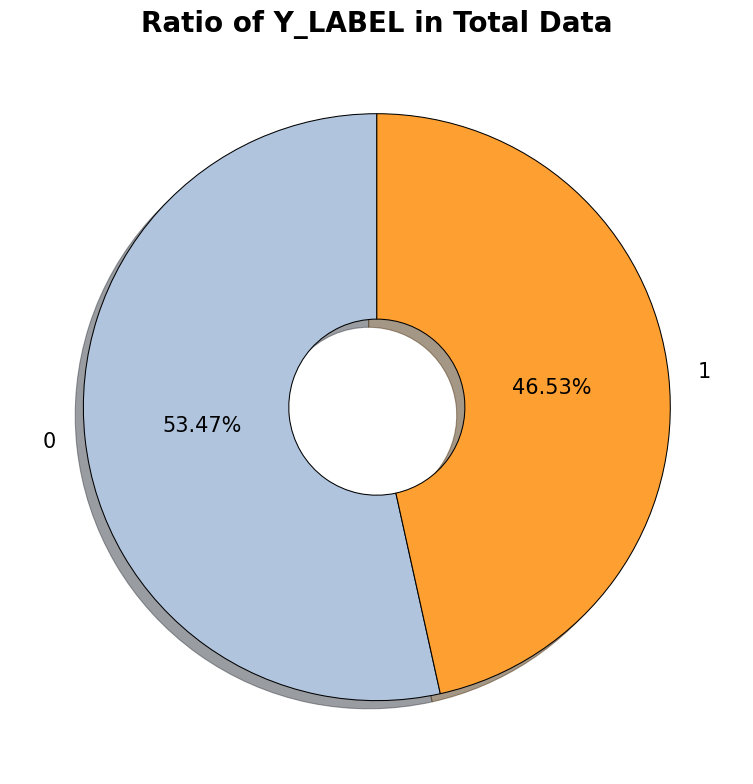

전체 데이터 수: 1599
전체 데이터 중 품질이 좋은 와인의  수:  855
전체 데이터 중 품질이 안좋은 와인의 수:  744


In [50]:
y_label_count(df)

In [51]:
df['quality'] = df['quality'].map({'good':0, 'bad':1})

In [52]:
df['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

In [53]:
forest = RandomForestClassifier(random_state=42,max_depth=10)

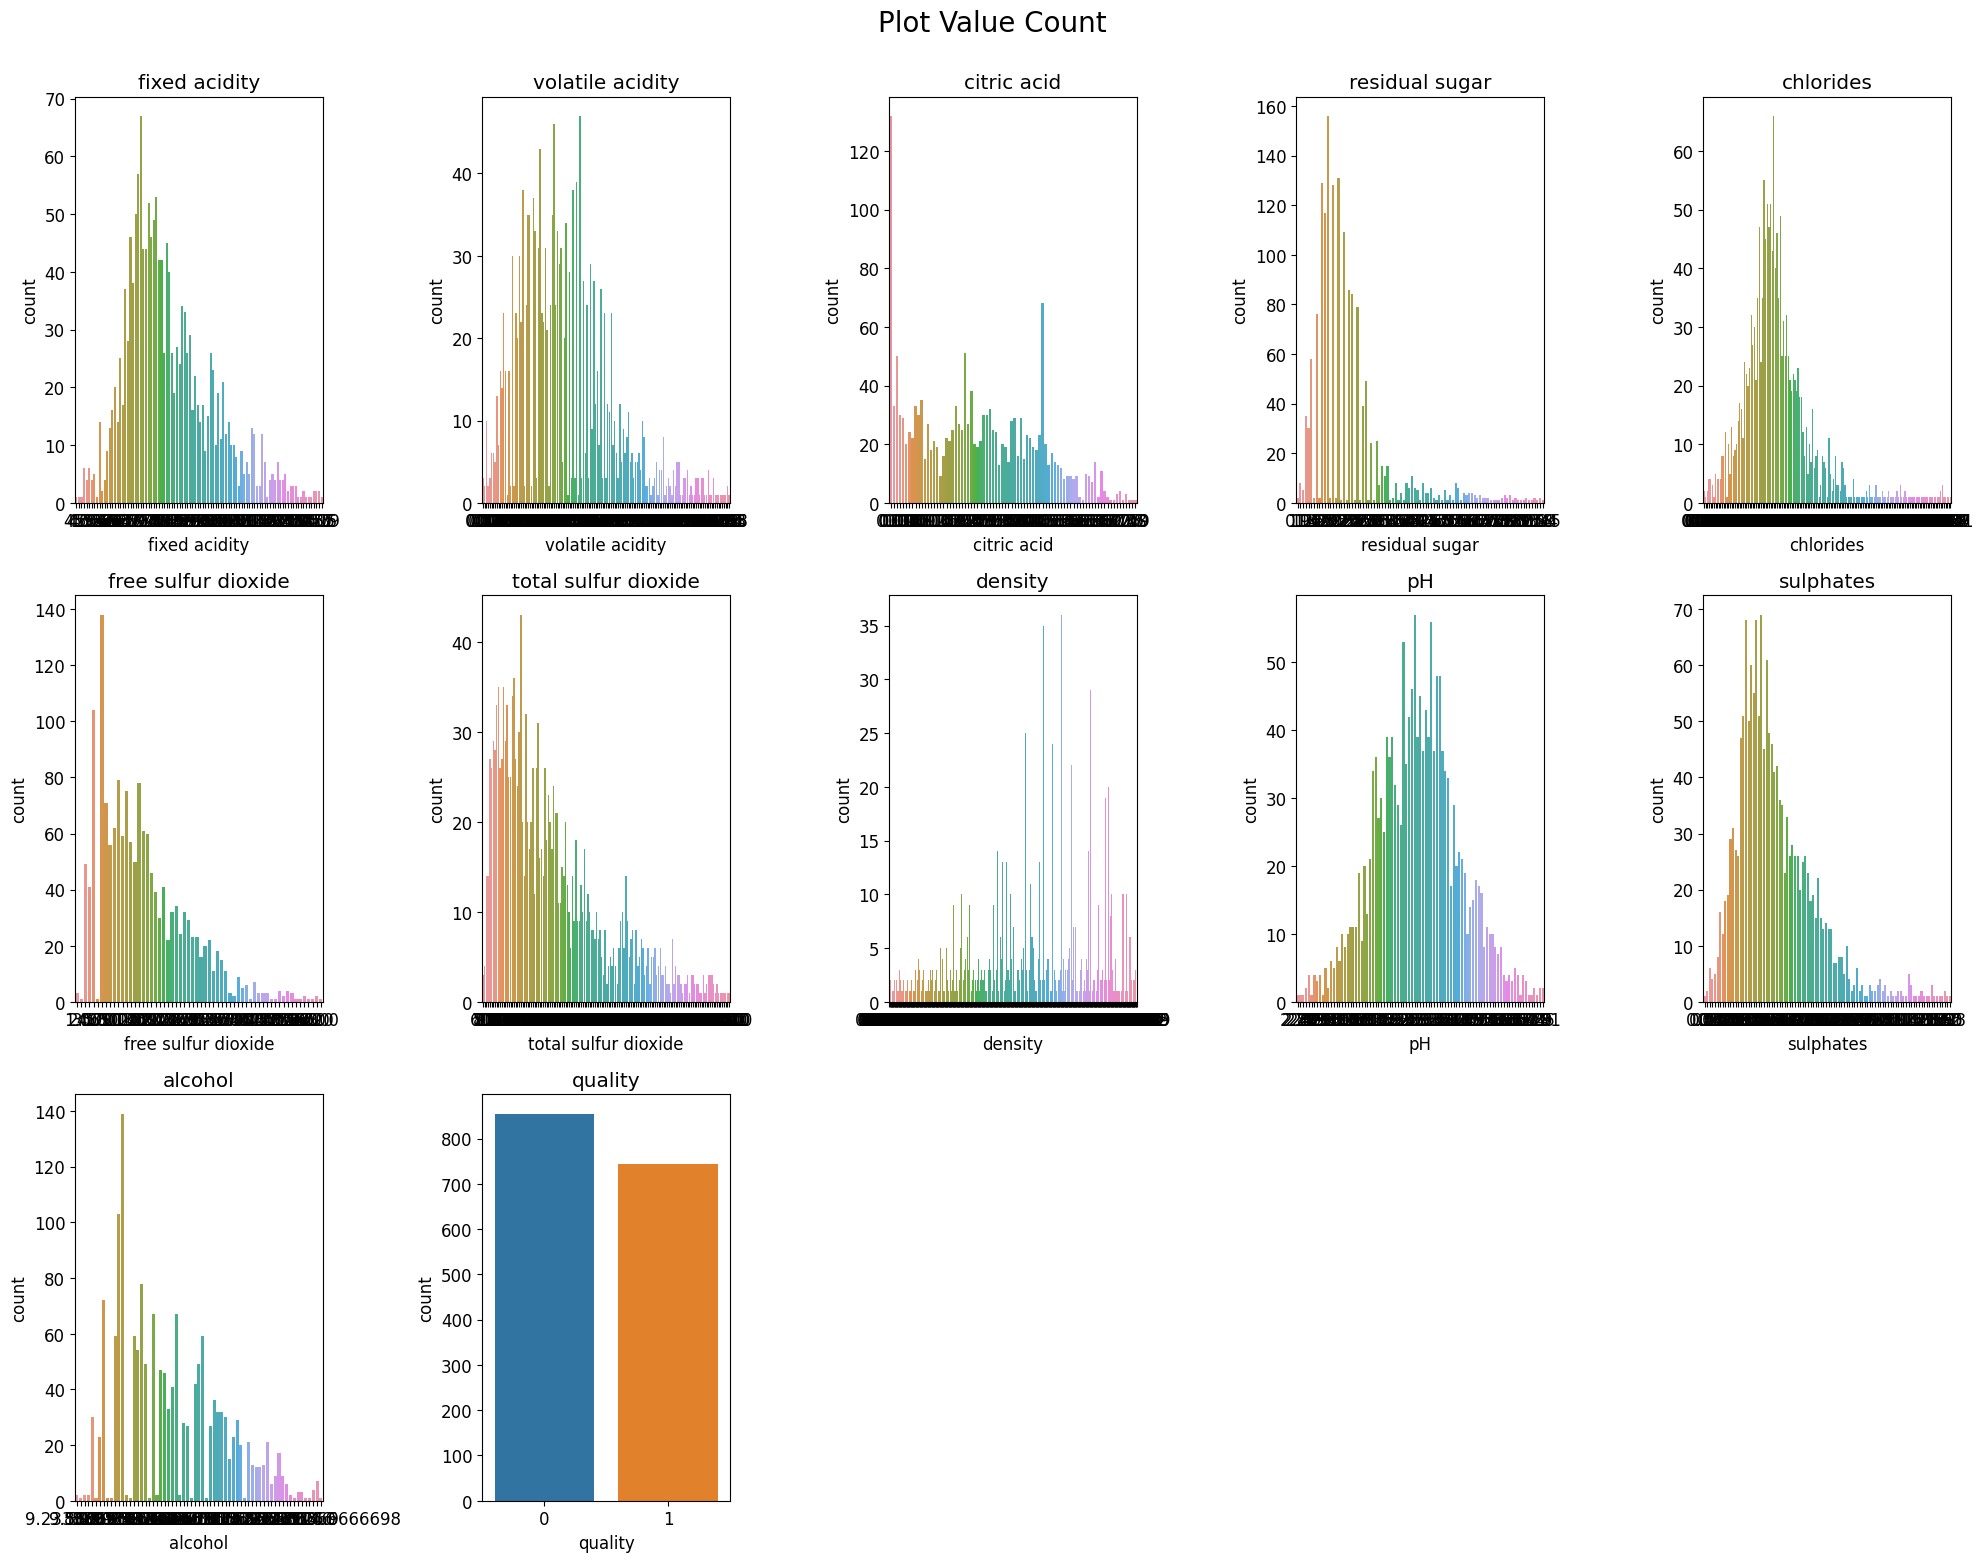

In [54]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

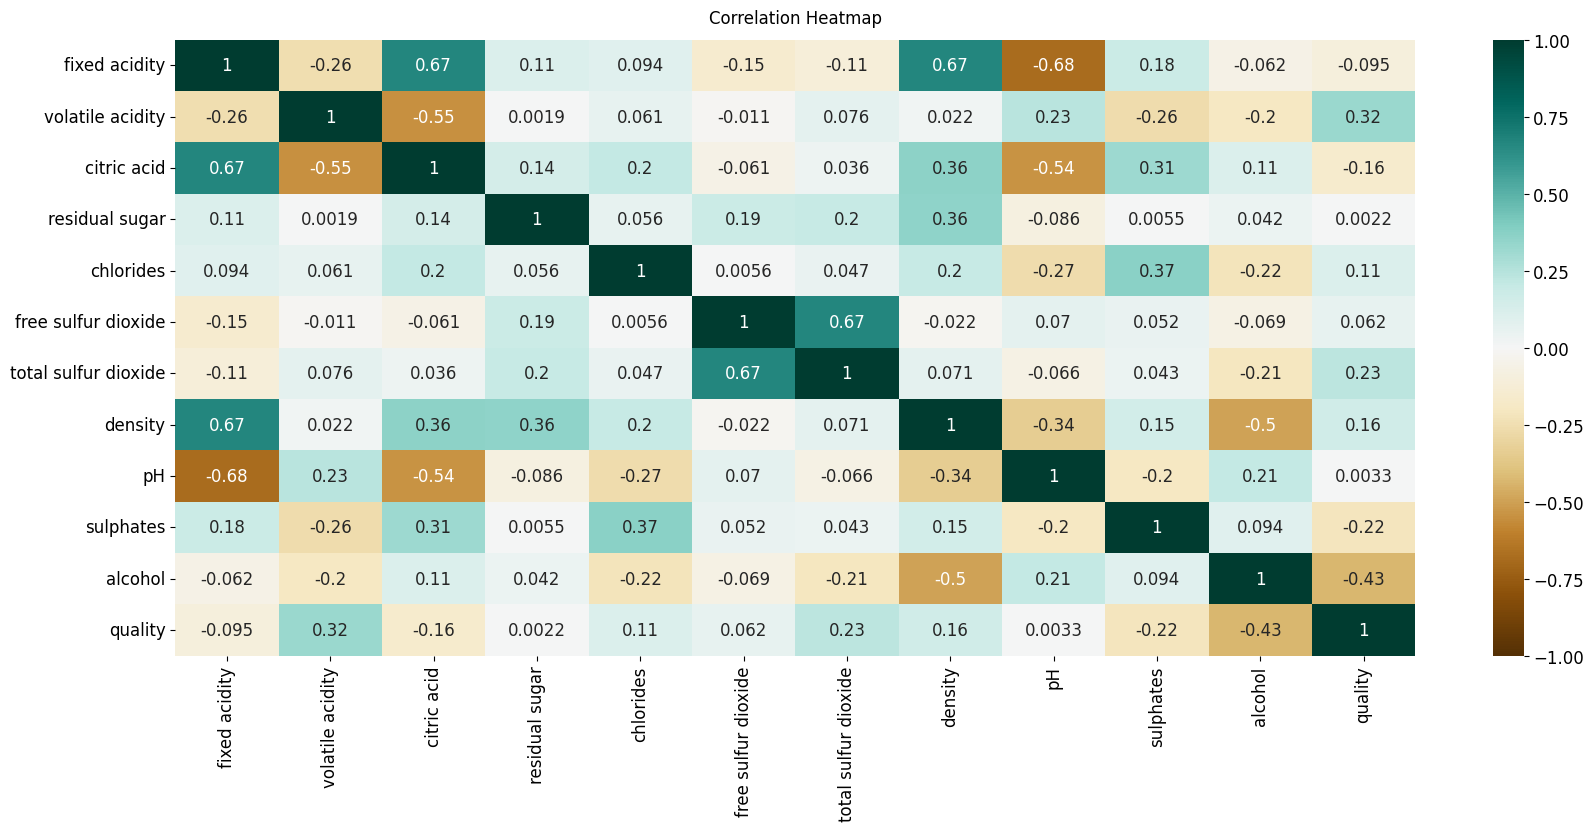

In [55]:
# Explore corrleations between features

plt.figure(figsize=(20,8))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [56]:
df['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

In [57]:
all_X=df.drop(['quality'],axis=1) 
all_y=df['quality']

In [58]:
forest.fit(all_X,all_y)

RandomForestClassifier(max_depth=10, random_state=42)

In [59]:
# 변수 중요도를 계산합니다.

importances=forest.feature_importances_

In [60]:
# 변수 중요도가 높은 것부터 차례로 정렬합니다.

indices=np.argsort(importances)[::-1]

In [61]:
print("Feature ranking:")
for f in range(all_X.shape[1]):
    print("%d. %s (%f)" % (f + 1, all_X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. alcohol (0.208321)
2. sulphates (0.138818)
3. volatile acidity (0.114543)
4. total sulfur dioxide (0.098079)
5. density (0.085239)
6. chlorides (0.073117)
7. fixed acidity (0.065576)
8. pH (0.060548)
9. citric acid (0.053928)
10. free sulfur dioxide (0.053461)
11. residual sugar (0.048371)


In [62]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

In [63]:
train_data=pd.concat([train_X,train_y],axis=1)
test_data=pd.concat([test_X,test_y],axis=1)

In [64]:
train_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/wine_train_data.csv',index=False)

test_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/wine_test_data.csv',index=False)